<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Team16/Kaggle-Challenge/blob/main/Kaggle_Challenge_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

import warnings
warnings.filterwarnings("ignore")
import numpy as npabr, pandas as pdan, matplotlib.pyplot as plttn
import seaborn as mlse, sklearn, datetime
import shap
from sklearn import naive_bayes, neural_network, ensemble, svm, tree, metrics
from sklearn import decomposition, preprocessing, feature_selection, utils, model_selection, utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.5 MB/s eta 0:00:00


## Data Reading and Processing


In [ ]:
def ReadData():
    dt=pdan.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team16/Kaggle-Challenge/main/train.csv")
    print("Total Records: {}".format(len(dt)))
    print("Total Data Features: {}".format(len(dt.columns)))
    ctTT=dt.dtypes[dt.dtypes=='object'].index.tolist()
    nmTT=dt.dtypes[dt.dtypes!='object'].index.tolist()
    print("Total Categorical Features: {}".format(len(ctTT)))
    print("Total Numerical Features: {}".format(len(nmTT)))
    return dt
TTDt=ReadData()
TTDt.head()

Total Records: 8693
Total Data Features: 14
Total Categorical Features: 7
Total Numerical Features: 7


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
TTDt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
TTDt.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
def CleanTT(ttn):
    print("Missing Values(Before Cleaning): {}".format(sum(ttn.isna().sum())))
    ctTT=ttn.dtypes[ttn.dtypes=='object'].index.tolist()
    nmTT=ttn.dtypes[ttn.dtypes!='object'].index.tolist()
    for dc in ctTT:
        ttn[dc]=ttn[dc].fillna(ttn[dc].mode()[0])
    for dn in nmTT:
        ttn[dn]=ttn[dn].fillna(ttn[dn].mean())
    print("Missing Values(After Cleaning): {}".format(sum(ttn.isna().sum())))
    return ttn
TTDtcln=CleanTT(TTDt)
TTDtcln.head()

Missing Values(Before Cleaning): 2324
Missing Values(After Cleaning): 0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
TTDt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [ ]:
TTDt["Transported"].unique()

array([False,  True])

In [ ]:
TTDt["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [ ]:
replacelist=["False","True"]
TTDtcln["Transported"]=TTDtcln["Transported"].replace(TTDtcln["Transported"].unique(),replacelist)
print(TTDtcln["Transported"].value_counts())
TTDtcln.head()

Transported
True     4378
False    4315
Name: count, dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Feature Encoding

In [ ]:
def TtnEnc(dt, typ):
    if typ=="train":
        ctTT=dt.dtypes[dt.dtypes=='object'].index.tolist()[:-1]
        blTT=dt.dtypes[dt.dtypes=='bool'].index.tolist()
        ctTT.extend(blTT)
        if len(ctTT)==0:
            print("No Feature With Object Type Detected!!")
            return dt
        else:
            for c in range(len(ctTT)):
                dt[ctTT[c]]=dt[ctTT[c]].replace(dt[ctTT[c]].unique(),[i+1 for i in range(len(dt[ctTT[c]].unique()))])
            print("Object Type Feature Detected and Encoded")
            return dt
    else:
        ctTT=dt.dtypes[dt.dtypes=='object'].index.tolist()
        blTT=dt.dtypes[dt.dtypes=='bool'].index.tolist()
        ctTT.extend(blTT)
        if len(ctTT)==0:
            print("No Feature With Object Type Detected!!")
            return dt
        else:
            for c in range(len(ctTT)):
                dt[ctTT[c]]=dt[ctTT[c]].replace(dt[ctTT[c]].unique(),[i+1 for i in range(len(dt[ctTT[c]].unique()))])
            print("Object Type Feature Detected and Encoded")
            return dt
TTDtbkp=TTDtcln.copy()
TTDtencd=TtnEnc(TTDtcln, "train")
TTDtencd

Object Type Feature Detected and Encoded


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,1,1,1,1,39.0,1,0.0,0.0,0.0,0.0,0.0,1,False
1,2,2,1,2,1,24.0,1,109.0,9.0,25.0,549.0,44.0,2,True
2,3,1,1,3,1,58.0,2,43.0,3576.0,0.0,6715.0,49.0,3,False
3,4,1,1,3,1,33.0,1,0.0,1283.0,371.0,3329.0,193.0,4,False
4,5,2,1,4,1,16.0,1,303.0,70.0,151.0,565.0,2.0,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8689,1,1,6557,3,41.0,2,0.0,6819.0,0.0,1643.0,74.0,8469,False
8689,8690,2,2,6558,2,18.0,1,0.0,0.0,0.0,0.0,0.0,8470,False
8690,8691,2,1,6559,1,26.0,1,0.0,0.0,1872.0,1.0,0.0,8471,True
8691,8692,1,1,6560,3,32.0,1,0.0,1049.0,0.0,353.0,3235.0,8472,False


## Outlier Detection and Minimization

In [ ]:
def pcares(ttn,n,col):
    mlar=npabr.array(ttn.iloc[:,:-1])
    pcamldr = decomposition.PCA(n_components=n)
    pcamldr.fit(mlar)
    cmpmldr=["Comp-{}".format(i+1) for i in range(len(pcamldr.explained_variance_ratio_.tolist()))]
    plttn.figure(figsize=(5,3))
    plttn.title("Variance(PCA={})\nVariance (Max): {}".format(n,round(max(pcamldr.explained_variance_ratio_),8)),fontsize=16)
    plttn.bar(cmpmldr,pcamldr.explained_variance_ratio_.tolist(),width=0.5,color=col)
    plttn.xlabel("Components of PCA",fontsize=12)
    plttn.ylabel("Variance",fontsize=12)
    plttn.grid()
    plttn.show()
    return pcamldr.explained_variance_ratio_

In [ ]:
def mlscl(ttn):
    mmsc = preprocessing.MinMaxScaler()
    scld=mmsc.fit_transform(ttn)
    return scld

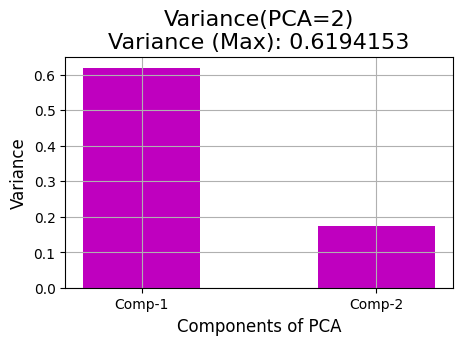

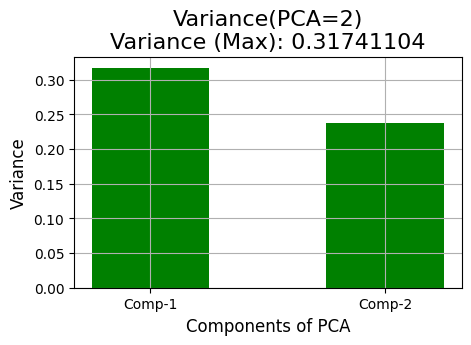

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0.000000,0.0,0.0,0.000000,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,0.000115,0.5,0.0,0.000152,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000118,True
2,0.000230,0.0,0.0,0.000305,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.000236,False
3,0.000345,0.0,0.0,0.000305,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000354,False
4,0.000460,0.5,0.0,0.000457,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000472,True
5,0.000575,0.5,0.0,0.000610,0.5,0.556962,0.0,0.000000,0.016201,0.000000,0.012986,0.000000,0.000590,True
6,0.000690,0.5,0.0,0.000762,0.0,0.329114,0.0,0.002932,0.051622,0.000128,0.000000,0.000000,0.000708,True
7,0.000805,0.5,1.0,0.000915,0.0,0.354430,0.0,0.000000,0.000000,0.000000,0.000000,0.012632,0.000826,True
8,0.000920,0.5,0.0,0.001067,0.0,0.443038,0.0,0.000000,0.026331,0.000724,0.009639,0.000000,0.000944,True
9,0.001035,0.0,1.0,0.001220,1.0,0.177215,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001062,True


In [ ]:
allvrs=[]
allvrs.append(pcares(TTDtencd.drop('Transported',axis=1),2,"m"))

mlrs=[]
for av in allvrs:
    if len(npabr.array(av))>1:
        mlrs.append(True)
if len(mlrs)==1 and True in mlrs:
    SclTTDt=mlscl(TTDtencd.drop('Transported',axis=1))
SclTTDt=pdan.DataFrame(SclTTDt,columns=TTDtencd.drop('Transported',axis=1).columns.tolist())
SclTTDt['Transported']=TTDtencd['Transported']
pcares(SclTTDt.drop('Transported',axis=1),2,"g")
SclTTDt.head(10)

## Feature Selection

In [ ]:
def RFEMethod(mldata):
    print("--------------------------------------------------------------")
    print("Feature Selection for using RFE")
    print("--------------------------------------------------------------")
    mlprd=mldata.drop(['Transported'],axis=1)
    mltrg=mldata['Transported']

    RFEMlDr=feature_selection.RFE(estimator=ensemble.RandomForestClassifier(),n_features_to_select = int(len(mldata.columns)*0.9), step = 0.3)
    RFEMlDr.fit(mlprd, mltrg)
    print("Selected Features Using RFE: \n",*mlprd.columns[RFEMlDr.get_support()],sep="\n")
    return mlprd.columns[RFEMlDr.get_support()]

In [ ]:
def ChiFet(mldata):
    print("--------------------------------------------------------------")
    print("Feature Selection using Chi-Squred")
    print("--------------------------------------------------------------")
    mlprd=mldata.drop(['Class'],axis=1)
    mltrg=mldata['Class']
    CHIMlDr=feature_selection.SelectKBest(feature_selection.chi2, k=int(len(mldata.columns)*0.9))
    CHIMlDr.fit(mlprd, mltrg)
    print("Selected Features Uisng Chi-Squred: \n",*mlprd.columns[CHIMlDr.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return mlprd.columns[CHIMlDr.get_support()]

In [ ]:
fet_rfe=RFEMethod(SclTTDt)
#fet_chi=ChiFet(SclTTDt)

--------------------------------------------------------------
Feature Selection for using RFE
--------------------------------------------------------------
Selected Features Using RFE: 

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Name


In [ ]:
'''fets=[]
fet_rfe=RFEMethod(SclTTDt)
fet_chi=ChiFet(SclTTDt)
for x in fet_chi:
    if x in fet_rfe:
        fets.append(x)
print(len(fets))'''

'fets=[]\nfet_rfe=RFEMethod(SclTTDt)\nfet_chi=ChiFet(SclTTDt)\nfor x in fet_chi:\n    if x in fet_rfe:\n        fets.append(x)\nprint(len(fets))'

## Preparing Predictor and Target Data

In [ ]:
SclTTDt=utils.resample(SclTTDt,replace = True, n_samples = len(SclTTDt)*2, random_state = 10).reset_index(drop=True)
SclTTDt=utils.resample(SclTTDt,replace = True, n_samples = int(len(SclTTDt)*0.5), random_state = 10).sample(frac=1).reset_index(drop=True)

In [ ]:
PrTT=SclTTDt[fet_rfe]
TrTT=SclTTDt['Transported']
PrTT.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0.011735,0.5,0.0,0.011740,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.011568
1,0.559250,0.5,0.0,0.556487,0.0,0.253165,0.066239,0.000000,0.00000,0.000223,0.000000,0.558428
2,0.159227,0.5,0.0,0.155359,0.0,0.797468,0.000209,0.026867,0.00000,0.000000,0.000207,0.159585
3,0.439945,1.0,0.0,0.439396,0.0,0.582278,0.015844,0.000000,0.06581,0.000134,0.000083,0.439802
4,0.599747,0.0,1.0,0.599329,0.0,0.367089,0.000000,0.000000,0.00000,0.000000,0.000000,0.599386


In [ ]:
TrTT

0        True
1       False
2        True
3        True
4        True
        ...  
8688     True
8689     True
8690    False
8691     True
8692    False
Name: Transported, Length: 8693, dtype: object

## Assigning Classifiers


In [ ]:
TTCl=[
    ensemble.RandomForestClassifier(),
    tree.DecisionTreeClassifier(),
    neural_network.MLPClassifier()
]
TTClnm=[
    "Random Forest",
    "Decision Tree",
    "Neural Network"
]

In [ ]:
TTCl[0]

RandomForestClassifier()

In [ ]:
TTCl[1]

DecisionTreeClassifier()

In [ ]:
TTCl[2]

MLPClassifier()

In [ ]:
XTrDtTT, XTsDtTT, yTrDtTT, yTsDtTT=model_selection.train_test_split(PrTT, TrTT, test_size=0.25, random_state=22)
print("Train Class Distribution: \n")
print(yTrDtTT.value_counts())
print("Test Class Distribution: \n")
print(yTsDtTT.value_counts())

Train Class Distribution: 

Transported
True     3281
False    3238
Name: count, dtype: int64
Test Class Distribution: 

Transported
False    1093
True     1081
Name: count, dtype: int64


## Hyperparameter Tuning

In [ ]:
TunePar=[
    [{'n_estimators': [100, 150],'criterion': ['gini', 'entropy'],'max_features':['sqrt', 'log2'],'max_depth':[80,100,150]}],
    [{"criterion":['gini', 'entropy'],"splitter":['best','random'],"max_features":['sqrt', 'log2']}],
    [{"activation":['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'],"max_iter":[50,100]}]
]

for lg in range(len(TTCl)):
    print("____________________________________________________")
    print("Tuning {}".format(TTClnm[lg]))
    print("____________________________________________________")
    TuneGSCV = model_selection.GridSearchCV(TTCl[lg], TunePar[lg], cv = 5, scoring='accuracy')
    TuneGSCV.fit(PrTT, TrTT)
    TTCl[lg]=TuneGSCV.best_estimator_
    print("____________________________________________________")
    print("{} Tuning Complete".format(TTClnm[lg]))
    print("____________________________________________________")
TTCl

____________________________________________________
Tuning Random Forest
____________________________________________________
____________________________________________________
Random Forest Tuning Complete
____________________________________________________
____________________________________________________
Tuning Decision Tree
____________________________________________________
____________________________________________________
Decision Tree Tuning Complete
____________________________________________________
____________________________________________________
Tuning Neural Network
____________________________________________________
____________________________________________________
Neural Network Tuning Complete
____________________________________________________


[RandomForestClassifier(max_depth=150, max_features='log2'),
 DecisionTreeClassifier(max_features='log2'),
 MLPClassifier(max_iter=100, solver='lbfgs')]

In [ ]:
TTCl[0]

RandomForestClassifier(max_depth=150, max_features='log2')

In [ ]:
TTCl[1]

DecisionTreeClassifier(max_features='log2')

In [ ]:
TTCl[2]

MLPClassifier(max_iter=100, solver='lbfgs')

## Prediction

_____________________________________________________________________________
                            Random Forest 
_____________________________________________________________________________

Train Accuracy: 100.0%
Test Accuracy: 92.46%
Overfit: 7.54%

Classification Report for Random Forest 

              precision    recall  f1-score   support

       False       0.91      0.94      0.93      1093
        True       0.94      0.91      0.92      1081

    accuracy                           0.92      2174
   macro avg       0.92      0.92      0.92      2174
weighted avg       0.92      0.92      0.92      2174



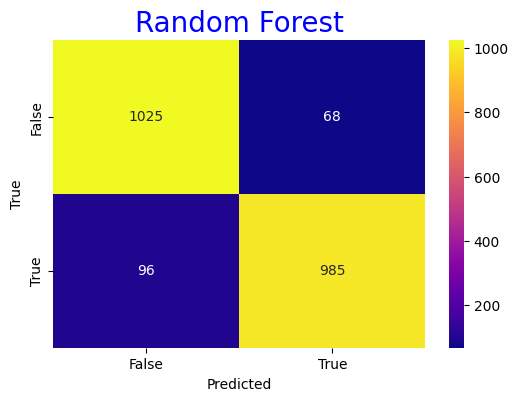

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________

Train Accuracy: 100.0%
Test Accuracy: 90.71%
Overfit: 9.29%

Classification Report for Decision Tree 

              precision    recall  f1-score   support

       False       0.90      0.91      0.91      1093
        True       0.91      0.90      0.91      1081

    accuracy                           0.91      2174
   macro avg       0.91      0.91      0.91      2174
weighted avg       0.91      0.91      0.91      2174



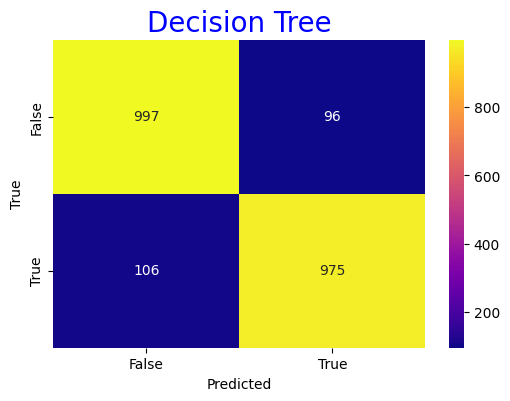

_____________________________________________________________________________
                            Neural Network 
_____________________________________________________________________________

Train Accuracy: 80.13%
Test Accuracy: 81.28%
Overfit: 1.15%

Classification Report for Neural Network 

              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1093
        True       0.81      0.82      0.81      1081

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



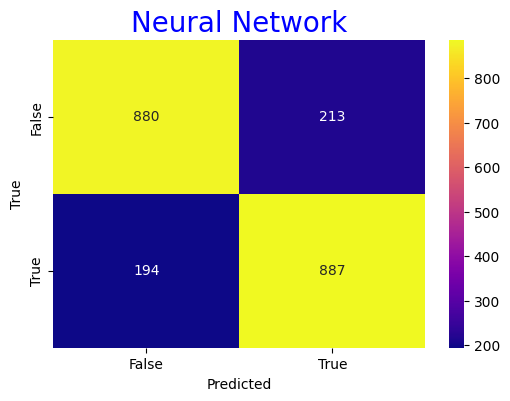

_____________________________________________________________________________


In [ ]:
ResTTDf=[[],[],[],[],[],[]]
print("_____________________________________________________________________________")
for i in range(len(TTCl)):
    print("                            {} ".format(TTClnm[i]))
    print("_____________________________________________________________________________")
    TTCl[i].fit(XTrDtTT,yTrDtTT)
    prdTT=TTCl[i].predict(XTsDtTT)
    TstTTAc=round(sklearn.metrics.accuracy_score(yTsDtTT,prdTT)*100,2)
    prdTT_tr=TTCl[i].predict(XTrDtTT)
    TrnTTAc=round(metrics.accuracy_score(yTrDtTT,prdTT_tr)*100,2)
    ResTTDf[0].append(TrnTTAc)
    ResTTDf[1].append(TstTTAc)
    clmt=metrics.precision_recall_fscore_support(yTsDtTT, prdTT, average='weighted')[:-1]
    ResTTDf[2].append(round(clmt[0],2)*100)
    ResTTDf[3].append(round(clmt[1],2)*100)
    ResTTDf[4].append(round(clmt[2],2)*100)

    OFTT=round(abs(TstTTAc-TrnTTAc),2)
    ResTTDf[5].append(OFTT)
    CMatTT=pdan.crosstab(yTsDtTT, prdTT, rownames=['True'], colnames=['Predicted'], margins=True)
    print("\nTrain Accuracy: {}%\nTest Accuracy: {}%\nOverfit: {}%".format(TrnTTAc,TstTTAc,OFTT))
    print("\nClassification Report for {} \n\n{}".format(TTClnm[i],sklearn.metrics.classification_report(yTsDtTT, prdTT)))

    plttn.figure(figsize=(6,4))
    plttn.title("{}".format(TTClnm[i]), fontsize=20,color="b")
    mlse.heatmap(CMatTT.iloc[:2,:2],fmt="d",annot=True,cmap="plasma")
    plttn.show()
    print("_____________________________________________________________________________")

ResTTDfDf=pdan.DataFrame({
    "Model":TTClnm,
    "Accuracy(Training)":ResTTDf[0],
    "Accuracy(Test)":ResTTDf[1],
    "Precision":ResTTDf[2],
    "Rercall":ResTTDf[3],
    "F1":ResTTDf[4],
    "Overfit":ResTTDf[5],
})

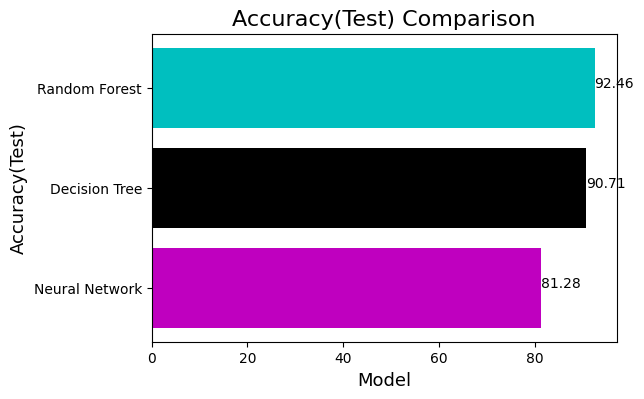

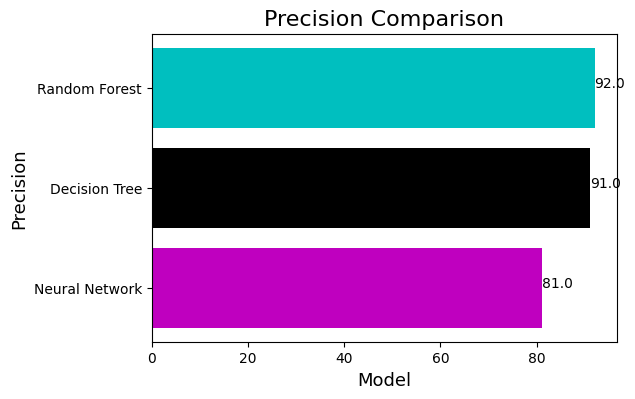

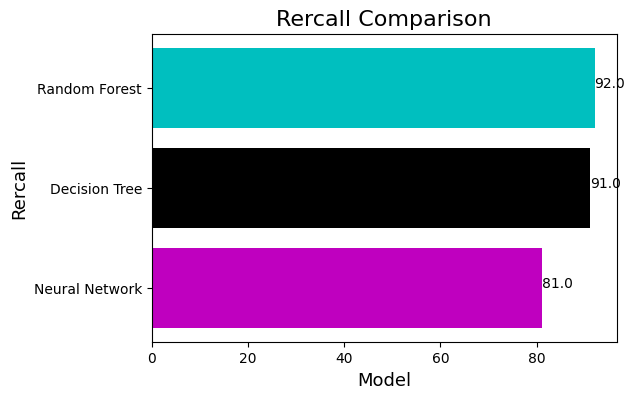

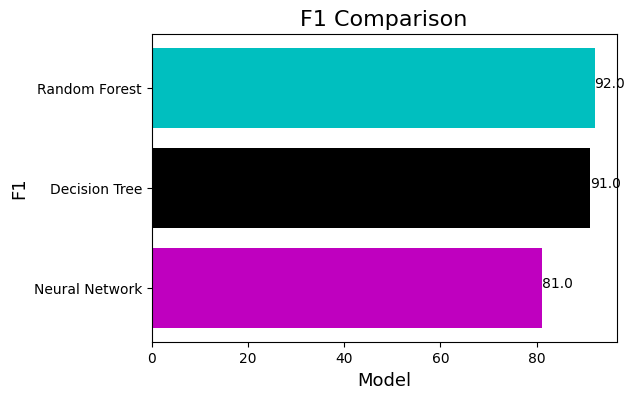

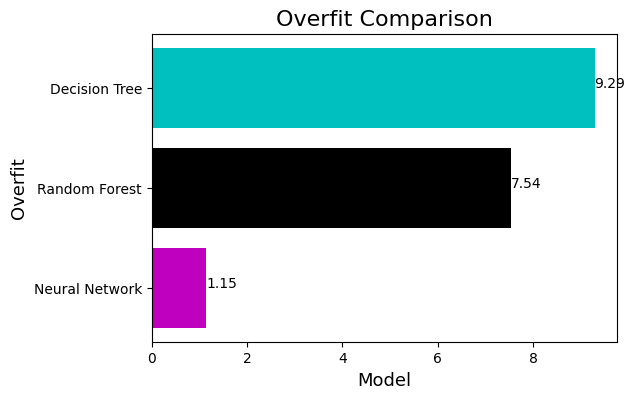

,Model,Accuracy(Training),Accuracy(Test),Precision,Rercall,F1,Overfit
0,Random Forest,100.00,92.46,92.0,92.0,92.0,7.54
1,Decision Tree,100.00,90.71,91.0,91.0,91.0,9.29
2,Neural Network,80.13,81.28,81.0,81.0,81.0,1.15


In [ ]:
AnClms=ResTTDfDf.columns.tolist()[2:]
for i in AnClms:
    ResTTDfDf=ResTTDfDf.sort_values(by=i,ascending=True)
    plttn.figure(figsize=(6,4))
    plttn.title("{} Comparison".format(i),fontsize=16)
    plttn.barh(ResTTDfDf['Model'],ResTTDfDf[i],color=["m","k","c","b","g"])
    plttn.xlabel("Model",fontsize=13)
    plttn.ylabel("{}".format(i),fontsize=13)
    for dfi1, dfi2 in enumerate(ResTTDfDf[i]):
        plttn.text(dfi2, dfi1, str(dfi2))
    plttn.show()
ResTTDfDf=ResTTDfDf.sort_values(by="Accuracy(Test)",ascending=False).reset_index(drop=True)
ResTTDfDf.to_csv("Titanic_Result.csv")
ResTTDfDf

In [ ]:
ResTTDfDf.iloc[0]

Model                 Random Forest
Accuracy(Training)            100.0
Accuracy(Test)                92.46
Precision                      92.0
Rercall                        92.0
F1                             92.0
Overfit                        7.54
Name: 0, dtype: object

In [ ]:
BstMdl=TTCl[0].fit(PrTT, TrTT)
BstMdl

RandomForestClassifier(max_depth=150, max_features='log2')

## Sample Submission

In [ ]:
SamplSb=pdan.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team16/Kaggle-Challenge/main/sample_submission.csv")
TT_Test=pdan.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team16/Kaggle-Challenge/main/test.csv")
SamplSb

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
TT_Test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
TT_Testcln=CleanTT(TT_Test)
TT_Testcln.head()

Missing Values(Before Cleaning): 1117
Missing Values(After Cleaning): 0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
TT_Testclnbkp=TT_Testcln.copy()
TT_Testencd=TtnEnc(TT_Testcln,"test")
TT_Testencd.head()

Object Type Feature Detected and Encoded


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,1,1,1,1,27.0,1,0.0,0.0,0.0,0.0,0.0,1
1,2,1,2,2,1,19.0,1,0.0,9.0,0.0,2823.0,0.0,2
2,3,2,1,3,2,31.0,1,0.0,0.0,0.0,0.0,0.0,3
3,4,2,2,4,1,38.0,1,0.0,6652.0,0.0,181.0,585.0,4
4,5,1,2,5,1,20.0,1,10.0,0.0,635.0,0.0,0.0,5


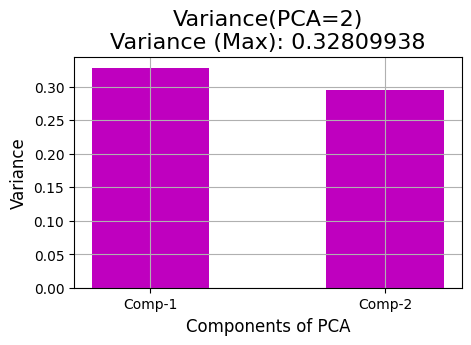

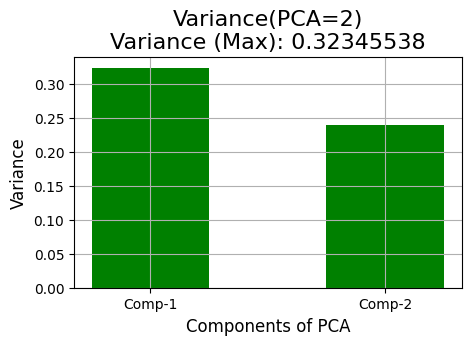

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0.000000,0.0,0.0,0.000000,0.0,0.341772,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000234,0.0,1.0,0.000306,0.0,0.240506,0.0,0.000000,0.000356,0.000000,0.142260,0.000000,0.000240
2,0.000468,0.5,0.0,0.000613,0.5,0.392405,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479
3,0.000702,0.5,1.0,0.000919,0.0,0.481013,0.0,0.000000,0.263206,0.000000,0.009121,0.026266,0.000719
4,0.000935,0.0,1.0,0.001225,0.0,0.253165,0.0,0.000865,0.000000,0.076580,0.000000,0.000000,0.000958
5,0.001169,0.0,1.0,0.001532,0.0,0.392405,0.0,0.000000,0.063902,0.031717,0.005694,0.002694,0.001198
6,0.001403,0.5,0.0,0.001838,0.5,0.265823,0.0,0.000000,0.017389,0.000000,0.000000,0.000000,0.001437
7,0.001637,0.5,0.0,0.002145,0.0,0.253165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001677
8,0.001871,0.5,0.0,0.002145,0.5,0.291139,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001916
9,0.002105,0.0,1.0,0.002451,0.5,0.303797,0.0,0.000000,0.025284,0.000000,0.000000,0.000000,0.002156


In [ ]:
allvrs=[]
allvrs.append(pcares(TT_Testencd,2,"m"))

mlrs=[]
for av in allvrs:
    if len(npabr.array(av))>1:
        mlrs.append(True)
if len(mlrs)==1 and True in mlrs:
    SclTT_Test=mlscl(TT_Testencd)
SclTT_Test=pdan.DataFrame(SclTT_Test,columns=TT_Testencd.columns.tolist())
pcares(SclTT_Test,2,"g")
SclTT_Test.head(10)

In [ ]:
TestData=SclTT_Test[fet_rfe]
TestData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0.000000,0.0,0.0,0.000000,0.0,0.341772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.000234,0.0,1.0,0.000306,0.0,0.240506,0.000000,0.000356,0.00000,0.142260,0.000000,0.000240
2,0.000468,0.5,0.0,0.000613,0.5,0.392405,0.000000,0.000000,0.00000,0.000000,0.000000,0.000479
3,0.000702,0.5,1.0,0.000919,0.0,0.481013,0.000000,0.263206,0.00000,0.009121,0.026266,0.000719
4,0.000935,0.0,1.0,0.001225,0.0,0.253165,0.000865,0.000000,0.07658,0.000000,0.000000,0.000958
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.999065,0.0,0.0,0.999081,0.0,0.430380,0.000000,0.000000,0.00000,0.000000,0.000000,0.999042
4273,0.999298,0.0,1.0,0.004596,0.0,0.531646,0.000000,0.033514,0.00205,0.000504,0.006466,0.999281
4274,0.999532,1.0,0.0,0.999387,0.5,0.362761,0.000000,0.000000,0.00000,0.000000,0.000000,0.999521
4275,0.999766,0.5,1.0,0.999694,0.0,0.362761,0.000000,0.106042,0.00000,0.000000,0.023482,0.999760


In [ ]:
print("Predicting Using Random Forest Classifier")
prdTT=BstMdl.predict(TestData)
SamplSb['Transported']=prdTT
SamplSb.to_csv("submission.csv", index =False)

Predicting Using Random Forest Classifier


## Explainable AI Model

The Passenger has not been Transported


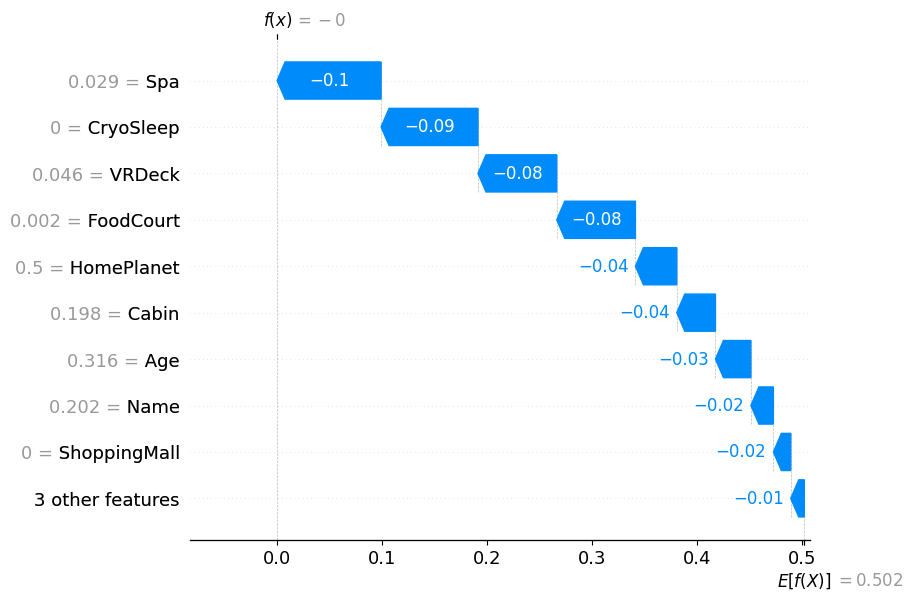

In [ ]:
explainer = shap.TreeExplainer(BstMdl)
shap_values = explainer(XTsDtTT)
no = 0
if BstMdl.predict(npabr.expand_dims(XTsDtTT.iloc[no],axis=0))[0] == 'True':
    print("The Passenger has been Transported")
else:
    print("The Passenger has not been Transported")
shap.plots.waterfall(shap_values[no,:,1])

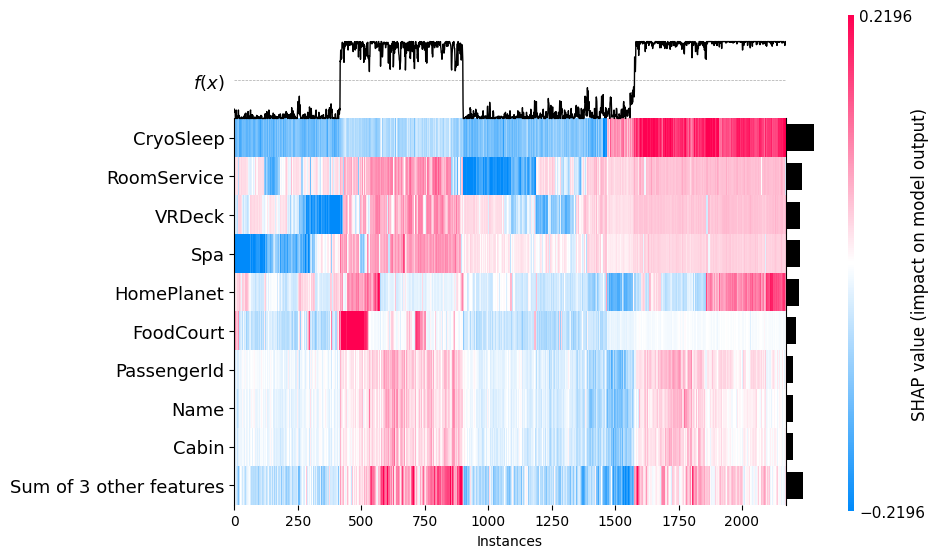

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values[:,:,1])

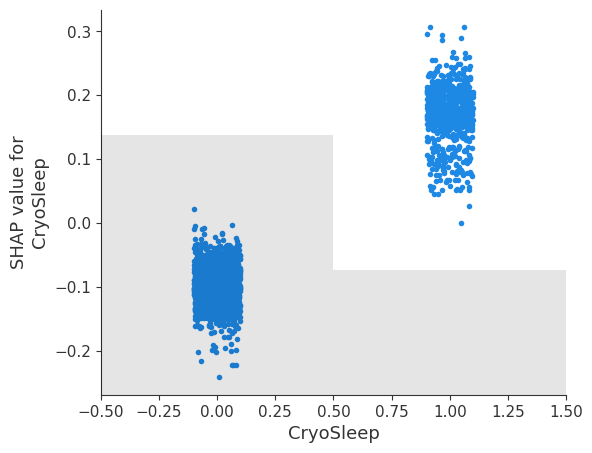

In [ ]:
shap.plots.scatter(shap_values[:,"CryoSleep",1])

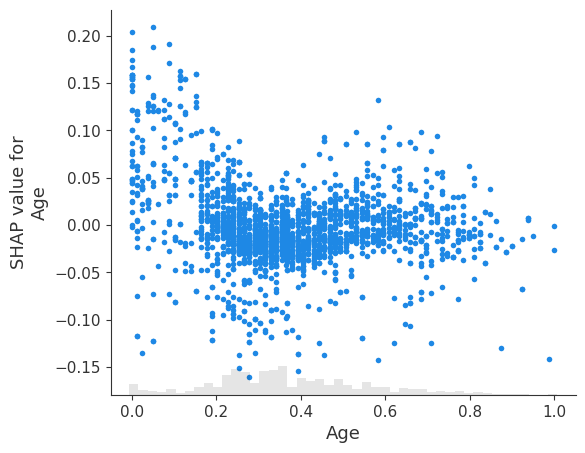

In [ ]:
shap.plots.scatter(shap_values[:,"Age",1])